In [14]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '2f5a6780-2fed-47cc-a89a-efd6b03243cc'
resource_group = 'ml_for_ccfd'
workspace_name = 'ml_for_ccfd_ws'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='Capstone_CCFD')
df=dataset.to_pandas_dataframe()

In [2]:
# pip install pycaret

In [3]:
import time
start_time = time.time()

from pycaret.classification import *
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [15]:
train,holdout = train_test_split(df, test_size=0.2, random_state=42)
model = setup(data=train, target='Class', train_size=0.75)

,Description,Value
0,Session id,2690
1,Target,Class
2,Target type,Binary
3,Original data shape,"(227845, 30)"
4,Transformed data shape,"(227845, 30)"
5,Transformed train set shape,"(170883, 30)"
6,Transformed test set shape,"(56962, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


In [5]:
best_model = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9996,0.9799,0.7936,0.9484,0.8629,0.8627,0.8667,2.4750
catboost,CatBoost Classifier,0.9996,0.9724,0.8106,0.9471,0.8721,0.8719,0.8753,32.1160
rf,Random Forest Classifier,0.9995,0.9462,0.7901,0.9221,0.8498,0.8496,0.8527,23.4160
et,Extra Trees Classifier,0.9995,0.9495,0.7869,0.9404,0.8556,0.8554,0.8594,2.3450
lda,Linear Discriminant Analysis,0.9994,0.9052,0.7737,0.8573,0.8102,0.8099,0.8125,0.2650
knn,K Neighbors Classifier,0.9992,0.8829,0.6248,0.8849,0.7286,0.7282,0.7412,6.3270
ada,Ada Boost Classifier,0.9992,0.9669,0.7015,0.8011,0.7450,0.7445,0.7477,9.2590
lr,Logistic Regression,0.9991,0.9778,0.6074,0.8564,0.7069,0.7065,0.7188,3.3350
dt,Decision Tree Classifier,0.9991,0.8745,0.7495,0.7435,0.7454,0.7449,0.7455,2.6430
svm,SVM - Linear Kernel,0.9991,0.0000,0.6083,0.8222,0.6858,0.6854,0.6995,0.1630


In [6]:
best_model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [7]:
end_time = time.time()

num_samples_test = len(holdout)
print(f"Number of samples in the test set: {num_samples_test} \n")

Workflow_Runtime = end_time - start_time
print(f"\nAutoML Workflow Runtime: {Workflow_Runtime:.2f} seconds")

Number of samples in the test set: 56962 


AutoML Workflow Runtime: 2136.02 seconds


In [8]:
start_time = time.time()
predictions = predict_model(best_model, data=holdout)
end_time = time.time()

conf_matrix = confusion_matrix(holdout['Class'], predictions['prediction_label'])

print(conf_matrix+"\n")

num_samples_test = len(holdout)
print(f"Number of samples in the test set: {num_samples_test}")

Prediction_Time = end_time - start_time
print(f"\nPrediction Time: {Prediction_Time:.2f} seconds")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9996,0.9725,0.7959,0.9630,0.8715,0.8713,0.8753


[[56861     3]
 [   20    78]]
Number of samples in the test set: 56962 


Prediction Time: 0.35 seconds


Number of samples in the test set: 56962 


Prediction Time: 0.35 seconds


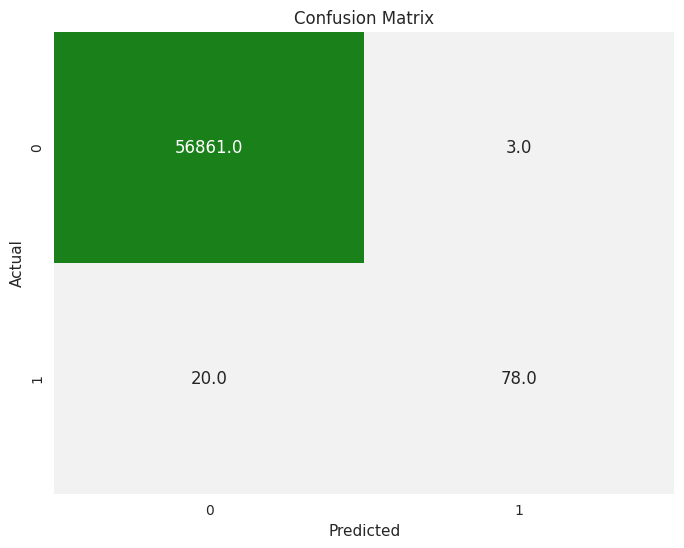

In [10]:
num_samples_test = len(holdout)
print(f"Number of samples in the test set: {num_samples_test} \n")

Prediction_Time = end_time - start_time
print(f"\nPrediction Time: {Prediction_Time:.2f} seconds")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams['font.sans-serif'] = 'DejaVu Sans'

TN = conf_matrix[0][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
FN=conf_matrix[1][0]

confusion_matrix_data = np.array([[TN, FP], [FN, TP]])
tn, fp, fn, tp = confusion_matrix_data.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

fig, ax = plt.subplots(figsize=(8, 6))

colors = [(0.95, 0.95, 0.95), (0.1, 0.5, 0.1)]
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

sns.heatmap(confusion_matrix_data, annot=True, fmt='.1f', cmap=cmap, ax=ax, cbar=False)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

plt.show()